In [6]:
!pip install git+https://github.com/jackywarner/montecarlo2.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jackywarner/montecarlo2.git to /tmp/pip-req-build-ai4tztvl
  Created wheel for montecarlo: filename=montecarlo-1.0.0-py3-none-any.whl size=2530 sha256=171f84e6577fedd458c2b66d1aa11869423446d70d8003d2afaefbdb2d45b37b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_dvtccwa/wheels/b6/88/f9/fc532e902fbd7241216c75366c37d1396881c364a93c51291f
Successfully built montecarlo


In [9]:
from montecarlo.montecarlo import Die, Game, Analyzer


0.001
0.003


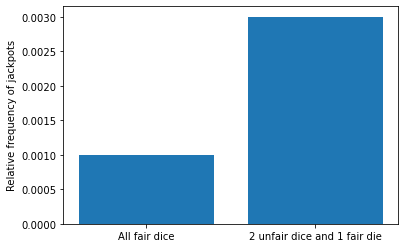

In [60]:
import matplotlib.pyplot as plt

# create fair coin
fair_coin = Die(['H', 'T'])

# create unfair coin
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

# play game with all fair dice
game1 = Game([fair_coin]*3)
game1.play(1000)
analyzer1 = Analyzer(game1)
jackpot1 = analyzer1.jackpot()
freq1 = jackpot1 / len(game1.results)
print(freq1)

# play game with 2 unfair dice and 1 fair die
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)
analyzer2 = Analyzer(game2)
jackpot2 = analyzer2.jackpot()
freq2 = jackpot2 / len(game2.results)
print(freq2)

# plot results in a bar chart
fig, ax = plt.subplots()
ax.bar(['All fair dice', '2 unfair dice and 1 fair die'], [freq1, freq2])
ax.set_ylabel('Relative frequency of jackpots')
plt.show()




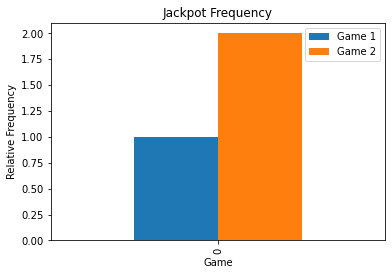

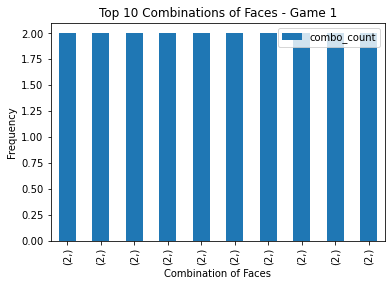

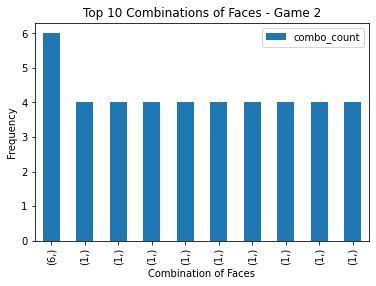

In [67]:
# Create fair die
fair_die = Die([1, 2, 3, 4, 5, 6])

# Create unfair dice
unfair1_die = Die([1, 2, 3, 4, 5, 6])
unfair1_die.change_weight(6, 5.0)

unfair2_die = Die([1, 2, 3, 4, 5, 6])
unfair2_die.change_weight(1, 5.0)

# Play game with 5 fair dice
game1_dice = [fair_die]*5
game1 = Game(game1_dice)
game1.play(10000)
analyzer1 = Analyzer(game1)

# Analyze results of game with 5 fair dice
jackpot1 = analyzer1.jackpot()
combo1 = analyzer1.combo()
top10_combos1 = combo1.nlargest(10, 'combo_count')

# Play game with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice
game2_dice = [unfair1_die]*2 + [unfair2_die] + [fair_die]*2
game2 = Game(game2_dice)
game2.play(10000)
analyzer2 = Analyzer(game2)

# Analyze results of game with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice
jackpot2 = analyzer2.jackpot()
combo2 = analyzer2.combo()
top10_combos2 = combo2.nlargest(10, 'combo_count')

# Plot results
import matplotlib.pyplot as plt

# Bar chart of jackpot frequency for both games
jackpot_freq = pd.DataFrame({'Game 1': [jackpot1], 'Game 2': [jackpot2]})
jackpot_freq.plot(kind='bar')
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Relative Frequency')
plt.show()

# Bar chart of top 10 combinations of faces for game 1
top10_combos1.plot(kind='bar')
plt.title('Top 10 Combinations of Faces - Game 1')
plt.xlabel('Combination of Faces')
plt.ylabel('Frequency')
plt.show()

# Bar chart of top 10 combinations of faces for game 2
top10_combos2.plot(kind='bar')
plt.title('Top 10 Combinations of Faces - Game 2')
plt.xlabel('Combination of Faces')
plt.ylabel('Frequency')
plt.show()


In [68]:
!pip install pyenchant
import enchant
english_dict = enchant.Dict("en_US")

import random

freq_table = {
    'A': 8.4966,
    'B': 2.0720,
    'C': 4.5388,
    'D': 3.3844,
    'E': 11.1607,
    'F': 1.8121,
    'G': 2.4705,
    'H': 3.0034,
    'I': 7.5448,
    'J': 0.1965,
    'K': 1.1016,
    'L': 5.4893,
    'M': 3.0129,
    'N': 6.6544,
    'O': 7.1635,
    'P': 3.1671,
    'Q': 0.1962,
    'R': 7.5809,
    'S': 5.7351,
    'T': 6.9509,
    'U': 3.6308,
    'V': 1.0074,
    'W': 1.2899,
    'X': 0.2902,
    'Y': 1.7779,
    'Z': 0.2722
}

die = []
for letter, weight in freq_table.items():
    for i in range(int(weight * 100)):
        die.append(letter)

random.shuffle(die)

import enchant

english_dict = enchant.Dict("en_US")

results = []
for i in range(1000):
    rolls = random.choices(die, k=5)
    word = ''.join(rolls)
    if english_dict.check(word):
        results.append(word)

# print(len(results))
print(len(results) / 1000)



Defaulting to user installation because normal site-packages is not writeable
0.005
